## Population Basics


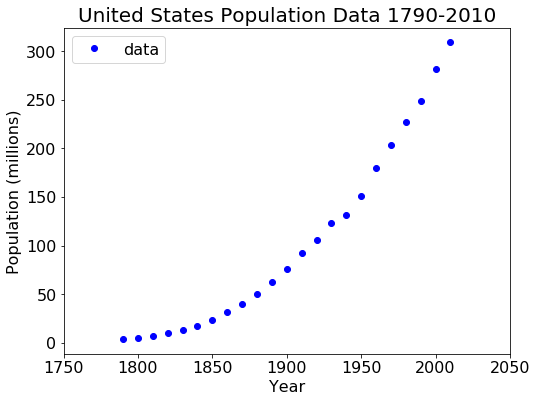

0.0199386048077


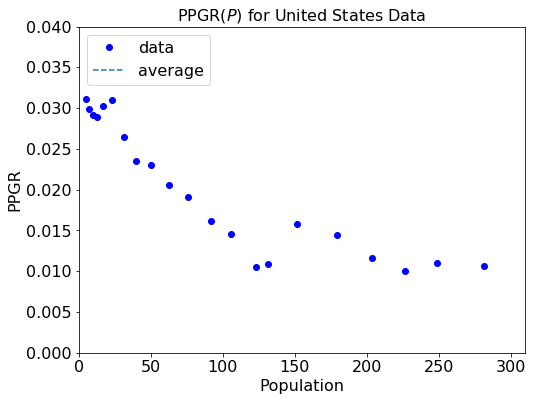

In [27]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#--------------------------------------------------
# Read and scale US Population Data.
#--------------------------------------------------
CensusFile = open('USPopulation.csv', 'r') #Don't you dare overwrite this file!
N = 23 # number of data points
i = 0
j = 0
USYears = np.zeros([N], dtype=int)
USPop0 = np.zeros([N], dtype=int)
for line in CensusFile:
    if i == 0 or i==1:
        i=i+1
    else:
        values = line.split(',')
        USYears[j] = int(values[0])
        USPop0[j] = int(values[1])
        j = j+1
        i = i+1

CensusFile.close()
USPop = USPop0/1.e6 #population as a floating point number in millions

plt.figure(figsize=(8,6))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
#
plt.plot(USYears, USPop, 'o', color='b', label='data')
plt.ylabel('Population (millions)', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.title('United States Population Data 1790-2010', fontsize=20)
plt.legend(loc=2, fontsize=16)
plt.xlim([1750, 2050])
plt.savefig('USPopData.png')
plt.show()
plt.close()

#Declare the array to store my PPGR values
M = N-2 #number of data points
PPGR = np.zeros([M])

for k in range(21):
    PPGR[k] =  (1/USPop[k+1])*((USPop[k+2]-USPop[k])/(USYears[k+2]-USYears[k]))
    k = k+1

avgPPGR = np.average(PPGR)
    
#PPGR graph
plt.figure(figsize=(8,6))

#
plt.plot(USPop[1:N-1], PPGR, 'o', color='b', label='data')
plt.plot(np.linspace(0,310,150),avgPPGR, linestyle='--', label='average')
plt.ylabel('PPGR', fontsize=16)
plt.xlabel('Population', fontsize=16)
plt.title('PPGR($P$) for United States Data', fontsize=16)
plt.legend(loc=2, fontsize=16)
plt.xlim([0, 310])
plt.ylim([0.000,0.040])
plt.show()
plt.close()
